[[[   0    0]]

 [[   0 1079]]

 [[1919 1079]]

 [[1919    0]]]
[[[418 639]]

 [[758 640]]

 [[757 986]]

 [[417 985]]]
[[[ 942  599]]

 [[1175  598]]

 [[1176  822]]

 [[ 943  823]]]
[[[564 274]]

 [[797 273]]

 [[798 496]]

 [[565 497]]]
[[[ 942  158]]

 [[1175  157]]

 [[1176  380]]

 [[ 943  381]]]
[]


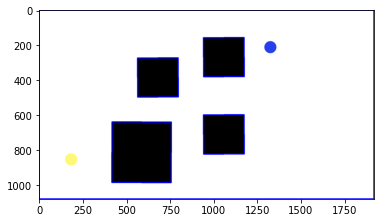

In [1]:
# Python code to detect an arrow (seven-sided shape) from an image.
import numpy as np
import cv2
from PIL import Image 
import math
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
   
# Reading image
img2 = cv2.imread('obs.png', cv2.IMREAD_COLOR)
   
# Reading same image in another variable and 
# converting to gray scale.
img = cv2.imread('obs.png', cv2.IMREAD_GRAYSCALE)
   
# Converting image to a binary image 
# (black and white only image).
_,threshold = cv2.threshold(img, 110, 255, 
                            cv2.THRESH_BINARY)
   
# Detecting shapes in image by selecting region 
# with same colors or intensity.
contours,_=cv2.findContours(threshold, cv2.RETR_TREE,
                            cv2.CHAIN_APPROX_SIMPLE)
polygons = []
   
# Searching through every region selected to 
# find the required polygon.
for cnt in contours :
    area = cv2.contourArea(cnt)
   
    # Shortlisting the regions based on there area.
    if area > 400: 
        approx = cv2.approxPolyDP(cnt, 
                                  0.009 * cv2.arcLength(cnt, True), True)
        print(approx)
   
        # Checking if the no. of sides of the selected region is 7.
        if(len(approx) == 4): 
            cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)
            
# Showing the image along with outlined arrow.
cv2.imshow('image2', img2) 
cv2.imwrite('lignes_red.png', img2)
   
# Exiting the window if 'q' is pressed on the keyboard.
#if cv2.waitKey(0) & 0xFF == ord('q'): 
#    cv2.destroyAllWindows()
plt.imshow(img2)
print(polygons)

True

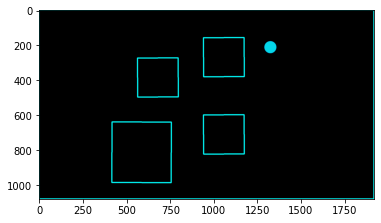

In [3]:
red = np.uint8([[[255,0,0 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)

img_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img2.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

plt.imshow(output_hsv)
cv2.imwrite('lignes.png', output_hsv)
#cv.waitKey(0)
#cv.destroyAllWindows()

corner x 797 y 274
corner x 565 y 274
corner x 1175 y 380
corner x 943 y 380
corner x 418 y 640
corner x 418 y 985
corner x 1174 y 821
corner x 943 y 158
corner x 1175 y 158
corner x 1174 y 600
corner x 565 y 496
corner x 797 y 496
corner x 943 y 600
corner x 756 y 985
corner x 756 y 640
corner x 943 y 822


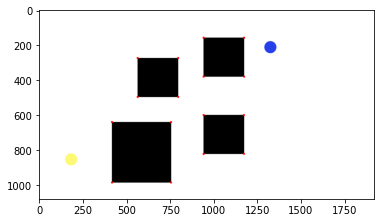

(<matplotlib.image.AxesImage at 0x7fde42244430>, None)

In [13]:
# read the image
obsdetect = cv2.imread('obs.png')
  
# convert image to gray scale image
gray = cv2.cvtColor(obsdetect, cv2.COLOR_BGR2GRAY)
  
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for i in corners:
    
    x, y = i.ravel()
    print(f'corner x {x} y {y}')
    cv2.circle(obsdetect, (x, y), 1, 255, 10)
  
plt.imshow(obsdetect), plt.show()

In [20]:
#https://stackoverflow.com/questions/58884265/python-convert-binary-mask-to-polygon
# open CV et geo pandas

contours,_=cv2.findContours(threshold, cv2.RETR_TREE,
                            cv2.CHAIN_APPROX_SIMPLE)
polygons = []
   

for object in contours:
    coords = []
        
    for point in object:
        coords.append(int(point[0][0]))
        coords.append(int(point[0][1]))

    polygons.append(coords)
    
print(polygons)
    

[[0, 0, 0, 1079, 1919, 1079, 1919, 0], [417, 640, 418, 639, 757, 639, 758, 640, 758, 985, 757, 986, 418, 986, 417, 985], [942, 599, 943, 598, 1175, 598, 1176, 599, 1176, 822, 1175, 823, 943, 823, 942, 822], [564, 274, 565, 273, 797, 273, 798, 274, 798, 496, 797, 497, 565, 497, 564, 496], [942, 158, 943, 157, 1175, 157, 1176, 158, 1176, 380, 1175, 381, 943, 381, 942, 380]]


In [ ]:
obs_hsv = Image.open('obsdetect.png') 
(largeur, hauteur)= obs_hsv.size
for x in range(1,largeur-1):
     for y in range(1,hauteur-1):
        if image_hsv.getpixel((x,y))!=(0,0,0):
            if (image_hsv.getpixel((x-1,y))==(0,0,0)) & (image_hsv.getpixel((x,y+1))==(0,0,0)) :
                mylistTLx.append(x)
                mylistTLy.append(y)
            if (image_hsv.getpixel((x+1,y))==(0,0,0)) & (image_hsv.getpixel((x,y-1))==(0,0,0)) :
                mylistBRx.append(x)
                mylistBRy.append(y)
print(mylistBRx)